In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss 

In [2]:
autos = pd.read_csv(r"C:\Users\Nithya\Downloads\autos.csv",sep=",",encoding="latin-1")
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [5]:
# q1: 1) Perform general Data analysis

In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [3]:
autos=autos.drop_duplicates()

In [15]:
autos.duplicated().sum()

0

In [4]:
autos=autos.fillna("Not mentioned")

In [7]:
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [8]:
# 2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot


In [10]:
autos.loc[(autos["yearOfRegistration"]<=2023), ["yearOfRegistration", "vehicleType"]]

,yearOfRegistration,vehicleType
0,1993,Not mentioned
1,2011,coupe
2,2004,suv
3,2001,kleinwagen
4,2008,kleinwagen
...,...,...
371523,2005,Not mentioned
371524,2000,cabrio
371525,1996,bus
371526,2002,kombi


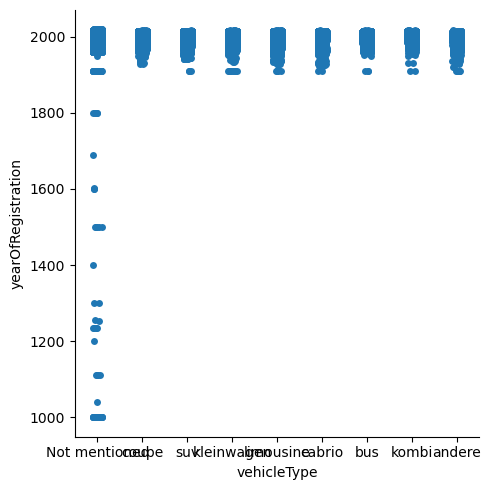

In [15]:
sns.catplot(x=autos["vehicleType"], y=autos.loc[(autos["yearOfRegistration"]<=2023), "yearOfRegistration"])
plt.show()

In [7]:
# 3) Create a plot based on the Variation of the price range by the vehicle type

In [29]:
p=pd.pivot_table(autos, index="vehicleType", values="price", aggfunc="mean")
p

,price
vehicleType,
Not mentioned,20137.725263
andere,677328.957700
bus,10302.742956
cabrio,15066.444013
coupe,25964.071214
kleinwagen,5694.287796
kombi,7741.302399
limousine,11116.186404
suv,13242.822397


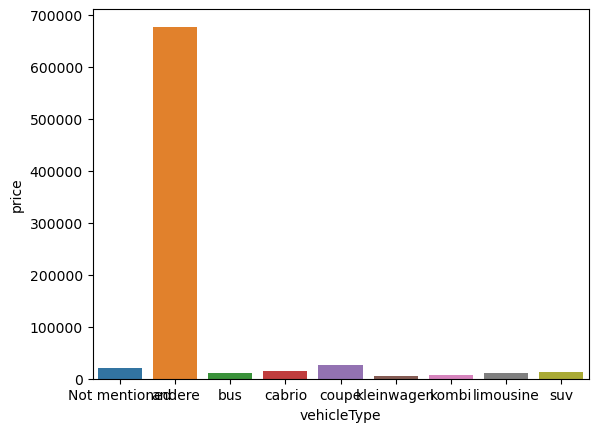

In [31]:
sns.barplot(p,x=p.index, y="price")
plt.show()

In [17]:
# 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [17]:
autos["vehicleType"].value_counts()

limousine        95894
kleinwagen       80022
kombi            67563
Not mentioned    37869
bus              30201
cabrio           22898
coupe            19013
suv              14707
andere            3357
Name: vehicleType, dtype: int64

<Axes: xlabel='vehicleType', ylabel='count'>

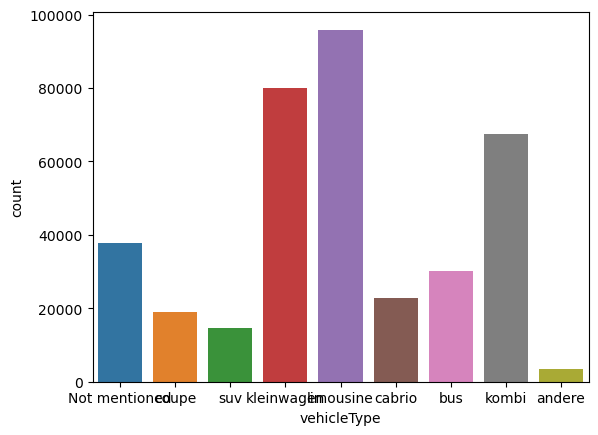

In [16]:
sns.countplot(autos, x="vehicleType")

In [34]:
# 5) Is there any relationship between dollar_price and kilometer? 

In [32]:
autos[["price", "kilometer"]].corr(method="pearson")

,price,kilometer
price,1.000000,-0.000635
kilometer,-0.000635,1.000000


<Axes: >

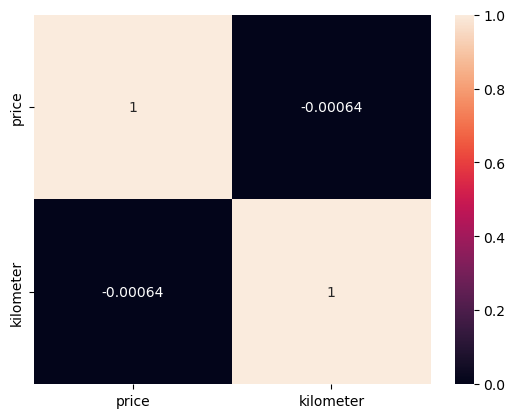

In [34]:
sns.heatmap(autos[["price", "kilometer"]].corr(method="pearson"), annot=True)